## Diagnostic models
Different models attempting to classify cysts as malignant or benign.

In [ ]:
import pickle
import numpy as np
import pandas as pd

with open('wdbc.pkl', 'rb') as f:
    data = pickle.load(f)

print(data.columns)
normalized_df=(data-data.min())/(data.max()-data.min())
data.head()

Index(['id', 'malignant', 'radius_0', 'texture_0', 'perimeter_0', 'area_0',
       'smoothness_0', 'compactness_0', 'concavity_0', 'concave points_0',
       'symmetry_0', 'fractal dimension_0', 'radius_1', 'texture_1',
       'perimeter_1', 'area_1', 'smoothness_1', 'compactness_1', 'concavity_1',
       'concave points_1', 'symmetry_1', 'fractal dimension_1', 'radius_2',
       'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2',
       'concavity_2', 'concave points_2', 'symmetry_2', 'fractal dimension_2'],
      dtype='object')


,id,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Inspecting dataset

<AxesSubplot:xlabel='fractal dimension_0', ylabel='fractal dimension_1'>

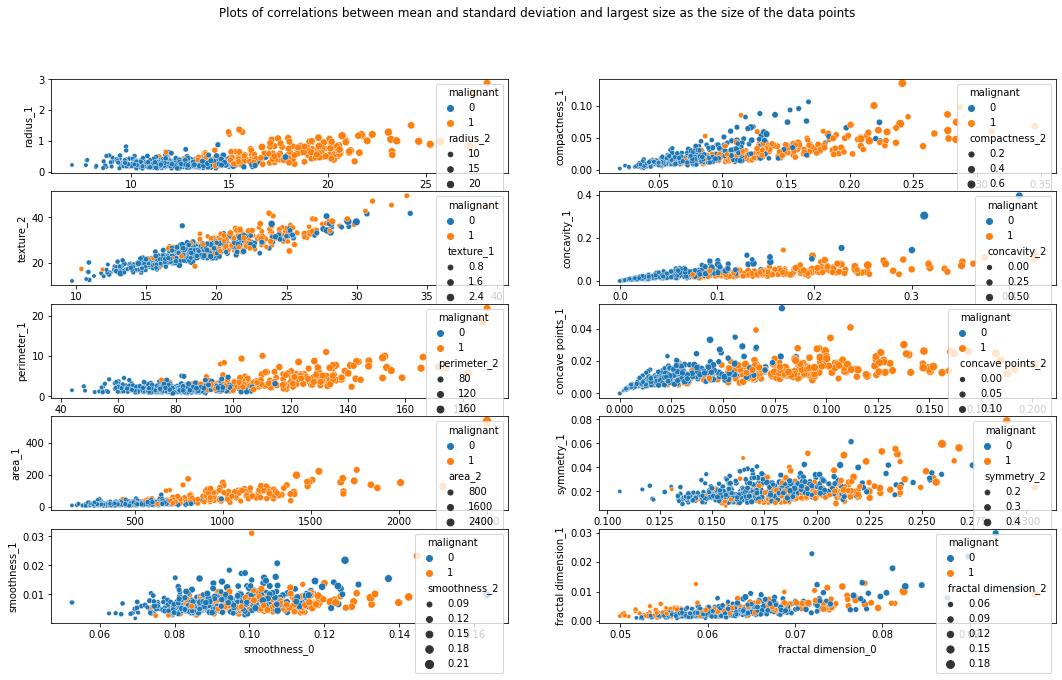

In [ ]:
# gather information on the data

import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 2, figsize=(18, 10))
fig.suptitle('Plots of correlations between mean and standard deviation and largest size as the size of the data points')

sns.scatterplot(ax=axes[0, 0], data = data, x ='radius_0', y = 'radius_1', hue= 'malignant', hue_order=[0,1], size = data['radius_2'])
sns.scatterplot(ax=axes[1, 0], data = data, x ='texture_0', y = 'texture_2', hue= 'malignant', hue_order=[0,1], size = data['texture_1'])
sns.scatterplot(ax=axes[2, 0], data = data, x ='perimeter_0', y = 'perimeter_1', hue= 'malignant', hue_order=[0,1], size = data['perimeter_2'])
sns.scatterplot(ax=axes[3, 0], data = data, x ='area_0', y = 'area_1', hue= 'malignant', hue_order=[0,1], size = data['area_2'])
sns.scatterplot(ax=axes[4, 0], data = data, x ='smoothness_0', y = 'smoothness_1', hue= 'malignant', hue_order=[0,1], size = data['smoothness_2'])
sns.scatterplot(ax=axes[0, 1], data = data, x ='compactness_0', y = 'compactness_1', hue= 'malignant', hue_order=[0,1], size = data['compactness_2'])
sns.scatterplot(ax=axes[1, 1], data = data, x ='concavity_0', y = 'concavity_1', hue= 'malignant', hue_order=[0,1], size = data['concavity_2'])
sns.scatterplot(ax=axes[2, 1], data = data, x ='concave points_0', y = 'concave points_1', hue= 'malignant', hue_order=[0,1], size = data['concave points_2'])
sns.scatterplot(ax=axes[3, 1], data = data, x ='symmetry_0', y = 'symmetry_1', hue= 'malignant', hue_order=[0,1], size = data['symmetry_2'])
sns.scatterplot(ax=axes[4, 1], data = data, x ='fractal dimension_0', y = 'fractal dimension_1', hue= 'malignant', hue_order=[0,1], size = data['fractal dimension_2'])



<AxesSubplot:>

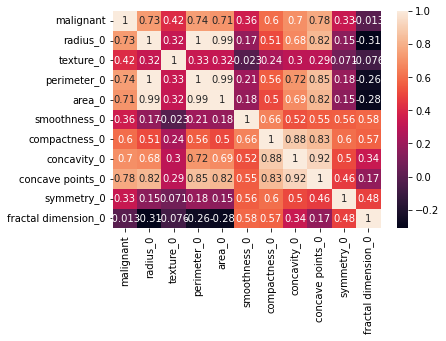

In [ ]:
sns.heatmap(data[['malignant', 'radius_0', 'texture_0', 'perimeter_0', 'area_0',
       'smoothness_0', 'compactness_0', 'concavity_0', 'concave points_0',
       'symmetry_0', 'fractal dimension_0']].corr(), annot=True)

<AxesSubplot:>

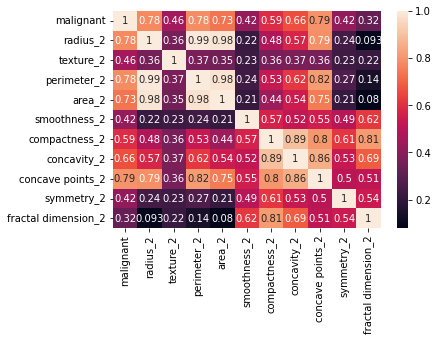

In [ ]:
sns.heatmap(data[['malignant', 'radius_2',
       'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2',
       'concavity_2', 'concave points_2', 'symmetry_2', 'fractal dimension_2']].corr(), annot=True)

<AxesSubplot:>

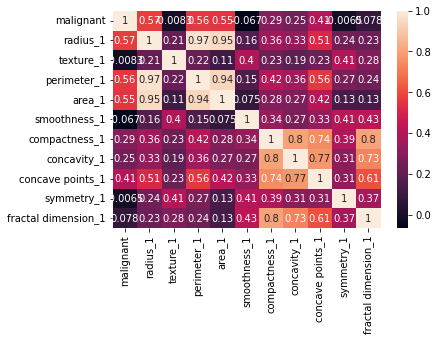

In [ ]:
sns.heatmap(data[['malignant','radius_1', 'texture_1',
       'perimeter_1', 'area_1', 'smoothness_1', 'compactness_1', 'concavity_1',
       'concave points_1', 'symmetry_1', 'fractal dimension_1']].corr(), annot=True)

## Rule based model 
_0: Mean \
_1: Std_dev\
_2: Worst/Largest

If [cell size is abnormal] -> Abnormal radius (\area\perimeter is almost 1-1 correlation) \
or [cell shape is abnormal] -> Concavity + Concave points \
or [cell texture is abnormal] -> texture\
or [cell similarity/homogeneity is abnormal] -> Abnormal standard deviations, checks if the cells are all pretty similar to eachother. \

then: diagnosis is malignant, \
otherwise: diagnosis is benign.

In [ ]:
import sklearn.metrics as metrics
# This model is considered as a preliminary diagnosis that would decide if the patient is most likely healthy. 
# Using this model 99/100 that have a malignent cancer would get to go into further diagnosis, while 50% 
# of healthy patients could go home without any further diagnosis.

# All metrics are from eye measurement of the plotted graphs.
def predict(df):
    df['predictions'] = np.where(
        (df['radius_0'] > 15) |
        (df['concave points_0'] > 0.06)|
        (df['texture_0'] > 20)|
        (df['concavity_0'] > 0.9)|
        (df['compactness_0'] > 0.1)|
        (df['symmetry_0'] > 0.2)|
        (df['area_0'] > 700)|
        (df['smoothness_0'] > 0.125)|
        (df['perimeter_0'] > 100),
        1, 0
    )
    return data['predictions']

def predict_symptomps(row):
    print("test subject: {}".format(row['id']))
    if row['radius_0'] > 15 : print("Average radius is high")
    if row['concave points_0'] > 0.06 : print("Average concave points is high")
    if row['texture_0'] > 20 : print("Average texture is high")
    if row['concavity_0'] > 0.9 : print("Average concavity is high")
    if row['compactness_0'] > 0.1 : print("Average compactness is high")
    if row['symmetry_0'] > 0.2 : print("Average symmetry is high")
    if row['area_0'] > 700 : print("Average area is high")
    if row['smoothness_0'] > 0.125 : print("Average concavity is high")
    if row['perimeter_0'] > 100 : print("Average perimeter is high")

print("accuracy: {}".format(metrics.accuracy_score(data['malignant'], predict(data)))) # accuracy
print("sensitivity: {}".format(metrics.recall_score(data['malignant'], predict(data)))) # tp / tp + fn
cm = metrics.confusion_matrix(data['malignant'], predict(data))
print("Specitivity: {}".format(cm[0][0] / (cm[0][0]+cm[0][1]))) # tn / tn + fp

print("")
predict_symptomps(data.iloc[5])
print("")
predict_symptomps(data.iloc[6])
print("")
predict_symptomps(data.iloc[8])
print("")
predict_symptomps(data.iloc[7])

accuracy: 0.6906854130052724
sensitivity: 0.9905660377358491
Specitivity: 0.5126050420168067

test subject: 843786.0
Average concave points is high
Average compactness is high
Average symmetry is high
Average concavity is high

test subject: 844359.0
Average radius is high
Average concave points is high
Average compactness is high
Average area is high
Average perimeter is high

test subject: 844981.0
Average concave points is high
Average texture is high
Average compactness is high
Average symmetry is high
Average concavity is high

test subject: 84458202.0
Average texture is high
Average compactness is high
Average symmetry is high


In [ ]:
# Simple search algorithm for finding optimal threshold
one_count = np.count_nonzero(data['malignant'].values)
zero_count = len(data)-one_count

def find_threshold(column):
    corr_zero = 0
    corr_one = one_count

    data.sort_values(column, inplace = True, ignore_index = True)
    tmp = data['malignant'].values

    best_score = one_count
    best_thresh = 0

    for idx in range(len(tmp)): 
        if tmp[idx] == 0:
            corr_zero +=1
        else:
            corr_one -=1
        if (corr_zero + corr_one * 0.5) >= best_score:
            best_thresh = idx
            best_score = (corr_zero + corr_one * 0.8) # Added weight to improve sensitivity
    
    thresh_val = data.loc[best_thresh,column]

    return thresh_val

#Example print
find_threshold('radius_2')

15.35

In [ ]:
#Proposed method for automatic rule based model
def predict(df):
    df['predictions'] = np.where(
        (df['radius_2'] > find_threshold('radius_2')) |
        (df['concave points_0'] > find_threshold('concave points_0'))|
        (df['texture_0'] > find_threshold('texture_0'))|
        (df['symmetry_0'] > find_threshold('symmetry_0')),
        1, 0
    )
    return data['predictions']

print("accuracy: {}".format(metrics.accuracy_score(data['malignant'], predict(data), normalize=True)))
print("sensitivity: {}".format( metrics.recall_score(data['malignant'], predict(data))))
cm = metrics.confusion_matrix(data['malignant'], predict(data))
print("Specitivity: {}".format(cm[0][0] / (cm[0][0]+cm[0][1]))) # tn / tn + fp

accuracy: 0.6432337434094904
sensitivity: 0.9905660377358491
Specitivity: 0.2857142857142857


# Random Forest

   accuracy    recall  precision
1  0.922682  0.840693   0.951211
2  0.947337  0.919913   0.940944
3  0.957863  0.929437   0.958712
4  0.954355  0.929437   0.949442
5  0.963158  0.929437   0.971592
6  0.961372  0.929437   0.966944
7  0.964881  0.934199   0.971273
8  0.963127  0.934199   0.966944
9  0.963127  0.934199   0.966944


Text(0, 0.5, 'percentage')

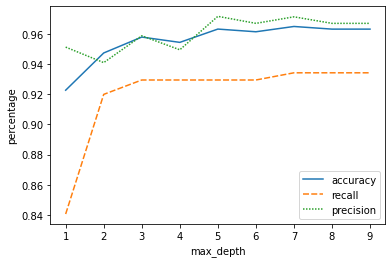

In [ ]:
#scikit random forrest 
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
with open('wdbc.pkl', 'rb') as f:
    data = pickle.load(f)
    
X = data.drop(['id', 'malignant'], axis=1, inplace=False)
Y = data['malignant']

res_df = pd.DataFrame({'accuracy':[], 'recall':[], 'precision':[]})

for i in range(1,10):
    clf = RandomForestClassifier(max_depth=i, random_state=1)
    res_df.loc[i] = [
        np.mean(cross_val_score(clf, X, Y, cv=10, scoring= 'accuracy')),
        np.mean(cross_val_score(clf, X, Y, cv=10, scoring='recall')),
        np.mean(cross_val_score(clf, X, Y, cv=10, scoring='precision'))
    ]

print(res_df)

sns.lineplot(data=res_df)
plt.xlabel("max_depth")
plt.ylabel("percentage")

# Tree

   accuracy    recall  precision
1  0.889317  0.798268   0.912003
2  0.920990  0.882468   0.902770
3  0.910464  0.858874   0.906785
4  0.915789  0.873377   0.888740
5  0.915789  0.891775   0.907270
6  0.926316  0.896320   0.882003
7  0.908678  0.887229   0.895380
8  0.912218  0.887229   0.891604
9  0.901535  0.887013   0.880579


Text(0, 0.5, 'percentage')

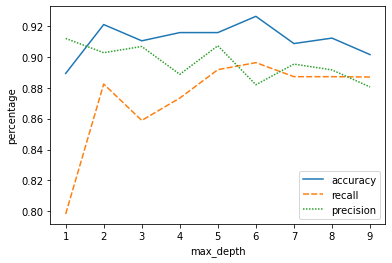

In [ ]:
# tree
from sklearn import tree

res_df = pd.DataFrame({'accuracy':[], 'recall':[], 'precision':[]})

for i in range(1,10):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    res_df.loc[i] = [
        np.mean(cross_val_score(clf, X, Y, cv=10, scoring= 'accuracy')),
        np.mean(cross_val_score(clf, X, Y, cv=10, scoring='recall')),
        np.mean(cross_val_score(clf, X, Y, cv=10, scoring='precision'))
    ]

print(res_df)

sns.lineplot(data=res_df)
plt.xlabel("max_depth")
plt.ylabel("percentage")

In [ ]:
#Altered tree model
def alt_tree_predict(df):
    df['predictions'] = np.where(
        ((df['radius_2'] < 16.8) & (df['concave points_2'] <=0.14)),
        0, 1
    )
    return data['predictions']

print("accuracy: {}".format(metrics.accuracy_score(data['malignant'], alt_tree_predict(data), normalize=True)))
print("sensitivity: {}".format( metrics.recall_score(data['malignant'], alt_tree_predict(data))))
cm = metrics.confusion_matrix(data['malignant'], alt_tree_predict(data))
print("Specitivity: {}".format(cm[0][0] / (cm[0][0]+cm[0][1]))) # tn / tn + fp

accuracy: 0.9367311072056239
sensitivity: 0.9575471698113207
Specitivity: 0.9243697478991597


<AxesSubplot:xlabel='radius_2', ylabel='concave points_2'>

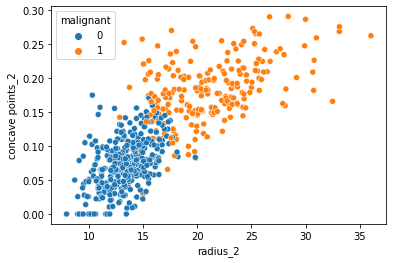

In [ ]:
sns.scatterplot(data = data, x ='radius_2', y = 'concave points_2', hue= 'malignant', hue_order=[0,1])

In [ ]:
def alt_tree_predict(df):
    df['predictions'] = np.where(
        df['radius_2'] < 16.0,
        0, 1
    )
    return data['predictions']

print("accuracy: {}".format(metrics.accuracy_score(data['malignant'], alt_tree_predict(data), normalize=True)))
print("sensitivity: {}".format( metrics.recall_score(data['malignant'], alt_tree_predict(data))))
cm = metrics.confusion_matrix(data['malignant'], alt_tree_predict(data))
print("Specitivity: {}".format(cm[0][0] / (cm[0][0]+cm[0][1]))) # tn / tn + fp

accuracy: 0.8980667838312829
sensitivity: 0.9009433962264151
Specitivity: 0.896358543417367


# Naive bayes

In [ ]:
# naive bayes

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

with open('wdbc.pkl', 'rb') as f:
    data = pickle.load(f)
    
X = data.drop(['id', 'malignant'], axis=1, inplace=False)
Y = data['malignant']

asd = clf.fit(X, Y)

print("accuracy: {}".format(np.mean(cross_val_score(clf, X, Y, cv=10, scoring= 'accuracy'))))
print("recall: {}".format(np.mean(cross_val_score(clf, X, Y, cv=10, scoring='recall'))))
print("precision: {}".format(np.mean(cross_val_score(clf, X, Y, cv=10, scoring='precision'))))

accuracy: 0.9367794486215537
recall: 0.8867965367965368
precision: 0.9417571509569086


In [ ]:
# Here we would like to shift the distributions a bit to increase the recall, a good way to do this would be to change the prios for malignant and
# beningnant. Currently they are belignant/all and malignant/all. As we can see below they are 0.63 and 0.37 respectively. 
# Increasing the value to maybe a uniform prior would increase the recall for the model.

clf.class_prior_

array([0.62741652, 0.37258348])

probability of belignant: 6.786239222238476e-05
probability of malignant: 0.999932137607778
benignant left plots, malignant right plots


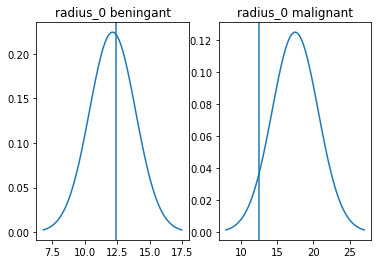

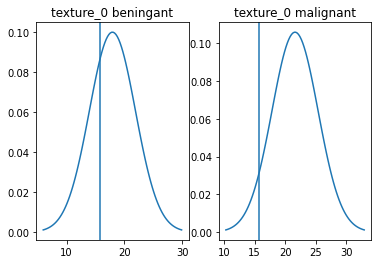

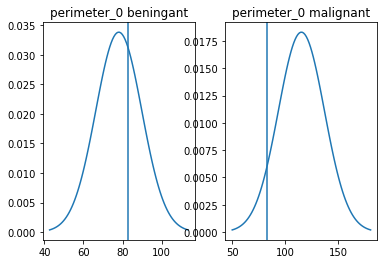

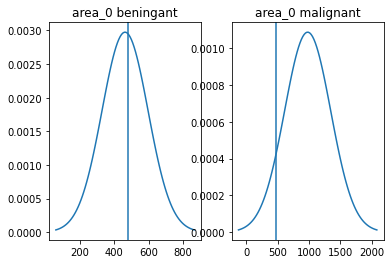

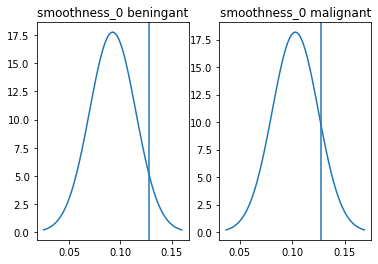

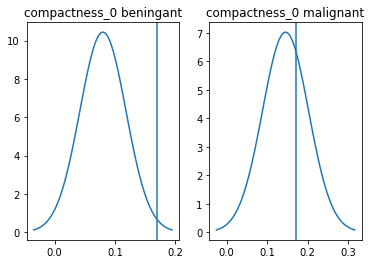

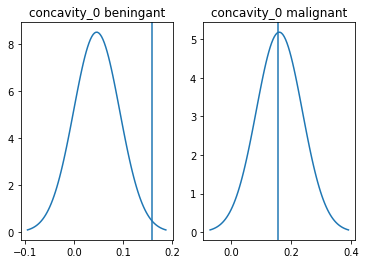

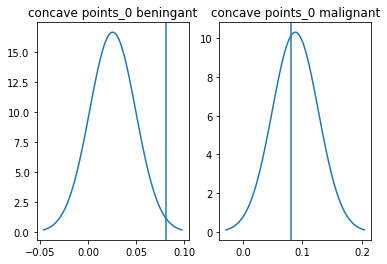

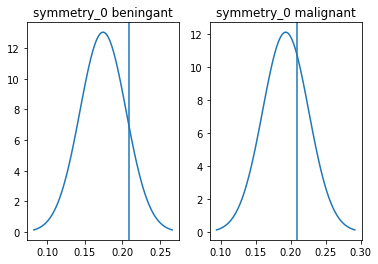

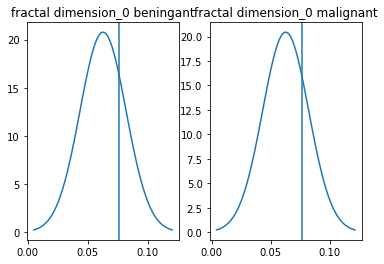

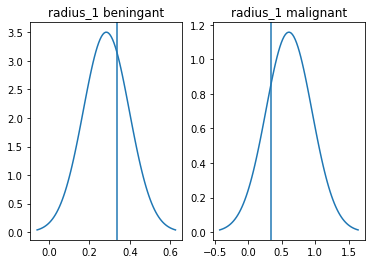

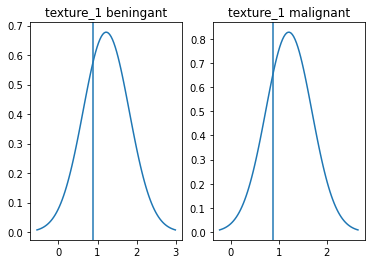

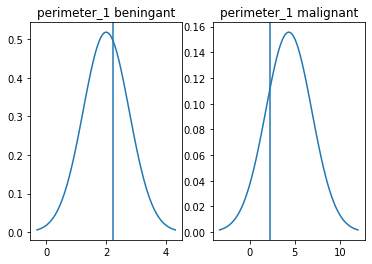

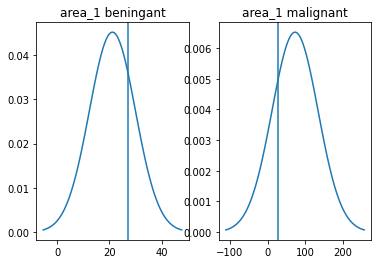

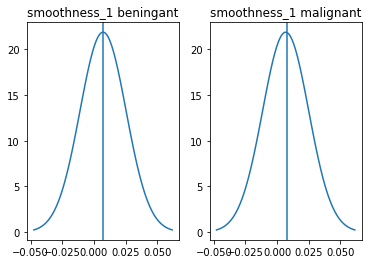

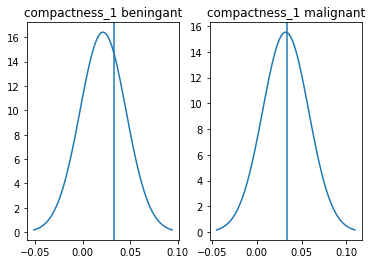

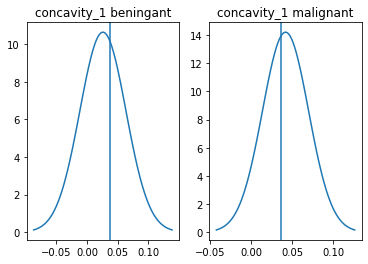

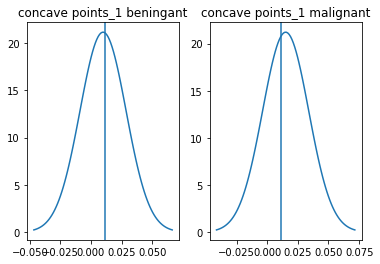

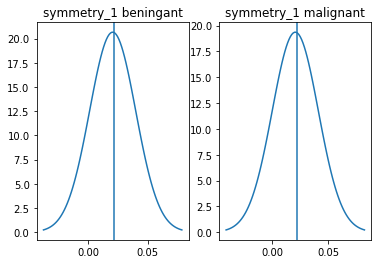

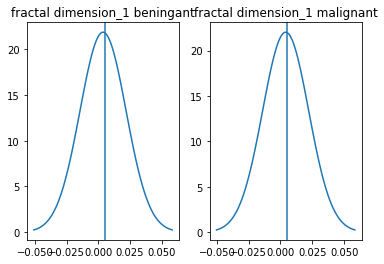

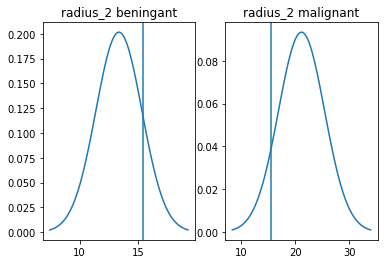

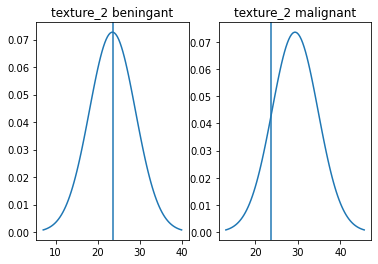

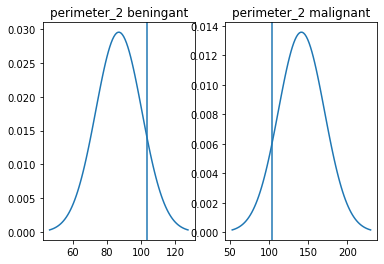

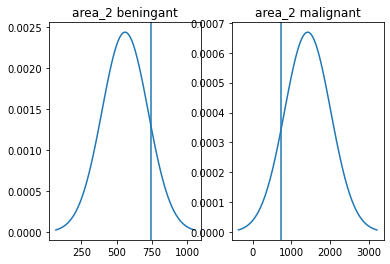

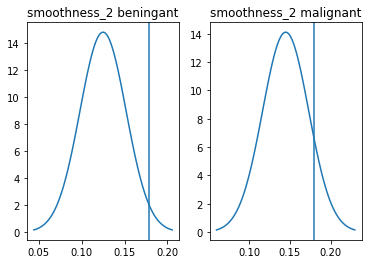

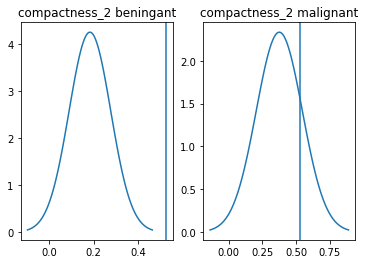

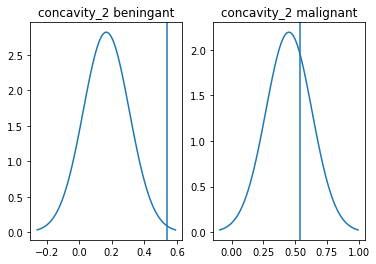

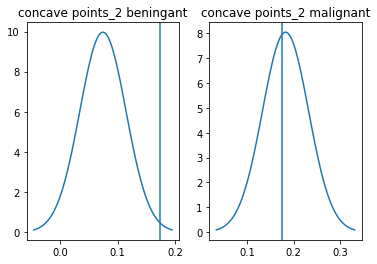

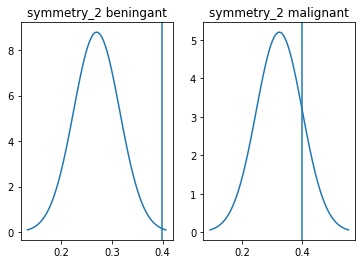

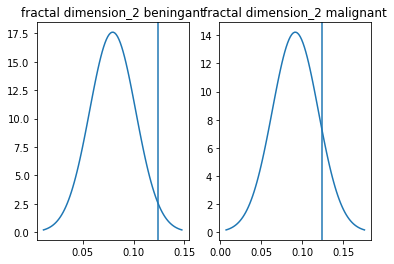

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

def distributionplots(features):
    print("probability of belignant: {}".format(clf.predict_proba(features.to_frame().transpose())[0][0]))
    print("probability of malignant: {}".format(clf.predict_proba(features.to_frame().transpose())[0][1]))
    print('benignant left plots, malignant right plots')
    j = 1
    for i in range(len(clf.theta_[0])):
        #adds plot of malignent = 0
        mu = clf.theta_[0][i]
        variance = clf.var_[0][i]
        sigma = math.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.subplot(1, 2, 1)
        plt.plot(x, stats.norm.pdf(x, mu, sigma),)
        plt.axvline(features[i], label = 'data point position')
        plt.title(X.columns[i] + " beningant")
        #adds plot of malignent = 1
        mu = clf.theta_[1][i]
        variance = clf.var_[1][i]
        sigma = math.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.subplot(1, 2, 2)
        plt.plot(x, stats.norm.pdf(x, mu, sigma))
        plt.axvline(features[i], label = 'data point position')
        plt.title(X.columns[i]+ " malignant")
        plt.show()

distributionplots(X.iloc[5])

# From the plots below we can together with a diagnosis(malignant or belignant from naive bayes) easily see what features seem healthy and not. 
# This could be done automatic aswell but we think plotting the distributions showcases more how likely the feature is to be malignant or not.

# On the plotted distributions below we can see the problems with the cells are concavity, smoothness, compactness and symmetry. 